# Training a Clustering Model with K-Means for the 5 Major Personality Traits

El objetivo de este proyecto es el de entrenar un modelo de clustering con el cual, mediante un test en nuestra aplicación de `Streamlit` podamos determinar a que grupo principal de personalidad pertenes. Para ello realizaremos en este cuaderno `Jupyter` el tratamiento de los datos de un dataset de cuestionarios ya realizados y entrenaremos a nuestro modelo, de forma que podamos exportarlo y usarlo en nuestra aplicación. De esta forma haremos que las predicciones de nuestro modelo sean más rápidas.

Nuestro dataset lo sacamos de `Kaggle`, donde tambien pudimos encontrar las preguntas necesarias para realizar el cuestionario:  
<a>https://www.kaggle.com/datasets/tunguz/big-five-personality-test</a> 



Este proyecto ha sido realizado por:

- Natalie Pilkington.
- Hugo Peralta Muñoz.
- Adrián Perogil Fernández.

## Imports


Empezaremos por importar las librerías necesarias para entrenar a nuestro modelo, para ello podremos realizar un `pip install -r requirements.txt`, en cuyo archivo las tendremos recopiladas y podremos instalarlas con un solo comando en nuestra máquina. 

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Hacemos la importación de las librerías que ya hemos instalado y realizaremos la lectura del dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_tests = pd.read_csv("data/data_tests.csv", sep="\t")

## Tratar datos del dataset

Quitaremos el límite que tiene por defecto `Pandas` para mostrar las columnas del dataset, de esta forma veremos todas las columnas que tiene.

In [4]:
pd.set_option("display.max_columns", None)
df_tests.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [5]:
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


Eliminamos las siguientes columnas, las cuales no nos aporta ninguna información valiosa. De esta forma nos quedaremos con la puntuación de cada pregunta, con las cuales entrenaremos a nuestro modelo, y algunos datos interesantes como el tiempo que han pasado realizando el cuestionario o el país de donde se realizó el cuestionario.

In [6]:
df_tests.drop(df_tests.columns[50:100], axis=1, inplace=True)

In [7]:
df_tests.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Interesting Data about the interviewed people in the dataset

### Top 10 countries by number of interviewed people

Primero de todo, veremos el top 10 de ciudades que tenemos en nuestro dataset, según la cantidad de encuestas realizadas.

In [8]:
country_counts = df_tests["country"].value_counts().head(10)
country_counts.head(10)

country
US      546403
GB       66596
CA       61849
AU       50030
PH       19847
IN       17491
DE       14095
NONE     13728
NZ       12992
NO       11417
Name: count, dtype: int64

C:\Users\Hugo Peralta\AppData\Local\Temp\ipykernel_10412\4289842899.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10') # Colour map (there are many others)


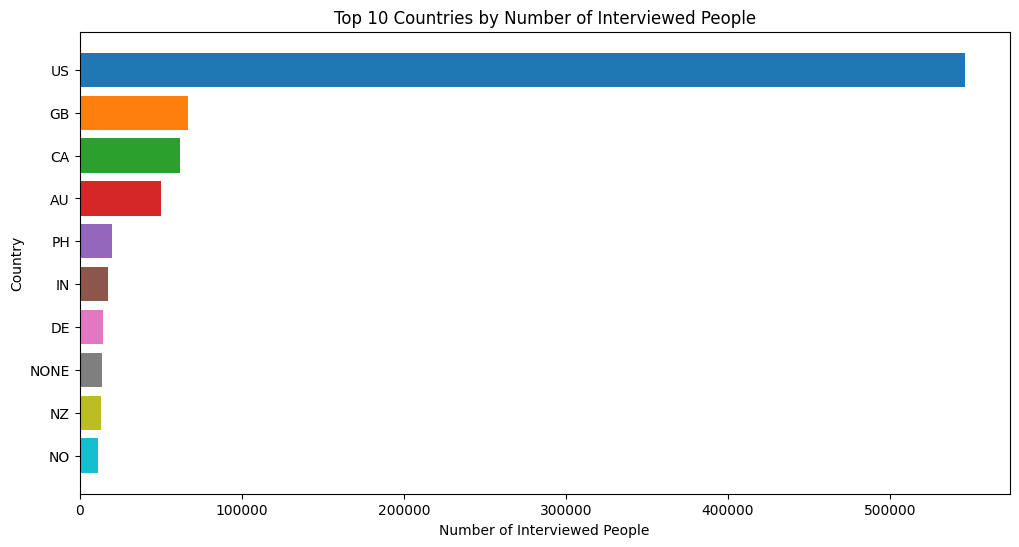

In [9]:
# Generate colors for each country
cmap = cm.get_cmap('tab10') # Colour map (there are many others)
colors = [cmap(i) for i in range(len(country_counts))]

plt.figure(figsize=(12, 6))
plt.barh(country_counts.index, country_counts.values, color=colors)

plt.title("Top 10 Countries by Number of Interviewed People")
plt.xlabel("Number of Interviewed People")
plt.ylabel("Country") 

# Invert y-axis to have the country with the highest number of interviewed people on top
plt.gca().invert_yaxis()

plt.show()

### Median Time Spent on the Test

In [23]:
mean_time_seconds = df_tests['testelapse'].mean()

mean_time_minutes = round(mean_time_seconds / 60, 2)

print(f"La media del tiempo transcurrido durante la prueba es de: {mean_time_minutes} minutos")

La media del tiempo transcurrido durante la prueba es de: 11.26 minutos


Según este resultado, entre que alguien se familiariza con el cuestionario de la aplicación de `Streamlit` podríamos estimar que la media de completación del test es entre $10$ y $15$ minutos aproximadamente.

## Preparing data

Para preparar los datos con los que trabajaremos nos quedaremos con la puntuación del cuestionario a las preguntas realizadas y trataremos con los nulos que tenemos.

In [10]:
training_df = df_tests.drop(df_tests.columns[50:], axis=1)

In [11]:
training_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


### Handling NaN Values

Podemos ver abajo las filas con las que cuenta el dataset, un total de $1015341$, de las cuales $1783$ entradas son cuentan con valores nulos.

Ya que en comparativa al total de entradas contamos con muy pocos nulos, en este caso, eliminaremos estas filas. 

In [12]:
print(training_df.shape[0])

1015341


In [13]:
print(training_df.isna().sum())

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64


In [14]:
training_df.dropna(inplace=True)

In [15]:
print(training_df.isna().sum())

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64


### Scale data


Lo que realizaremos a continuación es un escalado de los datos de nuestro dataset, de forma que las respuestas estarán en un rango de 0 a 1.

De esta forma facilitaremos el entrenamiento de nuestro modelo.

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

training_df = pd.DataFrame(scaler.fit_transform(training_df), columns=training_df.columns)

## Training of the K-Means personality model

Realizaremos ahora el entrenamiento de nuestro modelo con $5$ `clusters`, es decir, $5$ grupos principales de personalidad distintos, donde según el resultado del cuestionario, introducirá al usuario en uno de estos grupos principales. 

Pondremos la variable `random_state` con un valor por defecto como $15$, mediante el cual podremos replicar el comportamiento del modelo para que salga siempre unas predicciones iguales a este ejemplo, para cambiar esto solo hay que eliminar esta variable de la creación del modelo.

In [17]:
personality_model = KMeans(n_clusters=5, random_state=15) # Random state for reproducibility
personality_model.fit(training_df)

KMeans(n_clusters=5, random_state=15)

### Adding Cluster colum to each test

Una vez tengamos el modelo entrenado con nuestro dataset, podemos añadir el `cluster` al que pertenecería cada usuario según nuestro modelo como una columna.

In [18]:
final_df = training_df.copy()
final_df["Cluster"] = personality_model.labels_

In [19]:
final_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0,3
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6,2
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8,2
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6,0
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0,3
5,0.6,0.6,0.8,0.4,0.8,0.4,0.4,0.6,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.2,0.4,0.2,0.4,0.4,0.4,0.6,0.2,0.8,0.4,0.6,0.4,0.6,0.8,0.8,0.6,0.4,0.8,0.2,0.6,0.4,0.8,0.6,0.8,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.8,1.0,0.4,3
6,0.8,0.6,0.8,0.6,0.6,0.6,1.0,0.6,0.8,0.6,0.4,0.8,0.8,0.4,0.8,0.4,0.4,0.4,0.8,0.8,0.2,0.4,0.2,1.0,0.6,1.0,0.6,0.8,0.8,1.0,0.6,0.4,0.8,0.4,0.2,0.8,0.8,0.4,0.4,1.0,1.0,0.4,0.8,0.6,0.8,0.2,1.0,1.0,0.8,0.8,1
7,0.6,0.2,1.0,0.4,1.0,0.4,1.0,0.4,0.6,0.4,0.4,0.8,0.4,0.8,0.4,0.2,0.4,0.2,0.2,0.2,0.4,1.0,0.4,0.8,0.6,0.4,0.4,0.8,0.8,0.8,1.0,0.2,1.0,0.2,0.8,0.4,0.6,0.4,1.0,1.0,0.8,0.2,0.6,0.2,1.0,0.2,0.8,0.6,0.8,1.0,3
8,0.4,0.4,0.6,0.6,0.8,0.4,0.4,0.4,0.8,0.8,0.6,0.8,0.8,0.2,0.4,0.4,0.6,0.4,0.6,0.8,0.2,1.0,0.2,1.0,0.2,0.6,0.2,0.8,0.8,0.8,0.6,0.6,0.8,0.0,0.6,0.8,0.2,0.4,0.2,0.8,0.8,0.2,1.0,0.2,0.8,0.2,1.0,0.4,1.0,1.0,3
9,0.2,1.0,0.6,1.0,0.4,0.6,0.4,0.8,1.0,0.8,0.6,0.6,0.6,0.6,0.8,0.6,0.6,0.6,0.6,0.6,1.0,0.6,1.0,0.2,1.0,0.6,0.8,0.4,0.6,0.4,0.4,1.0,0.2,1.0,0.2,0.8,0.6,0.8,0.4,0.4,0.6,0.2,0.6,0.2,0.6,0.6,0.8,0.6,0.6,0.6,0


## Export Personality Model

Terminaremos este cuaderno con la exportación de nuestro modelo para poder usarlo de forma local, de esta forma no tenemos que depender de entrenar el modelo de nuevo y realizar la predicción, lo cual tardaría bastante cada vez que queramos predecir a qué grupo pertenecemos.

Esto lo realizaremos gracias a la biblioteca `Joblib`, la cual utilizaremos posteriormente en nuestra aplicación `Streamlit` para cargar el modelo de vuelta.

In [20]:
joblib.dump(personality_model, "model/personality_model.joblib")

['model/personality_model.joblib']